In [2]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
credits = pd.read_csv('data/IMDB/tmdb_5000_credits.csv')
movies = pd.read_csv('data/IMDB/tmdb_5000_movies.csv')

# Cast movie budgets to more easy to comprehend by default types data
movies.budget = movies.budget/1000000
movies.revenue = movies.revenue/1000000

In [4]:
# Let's use budget, revenue and runtime as starting point
X = movies[['budget', 'revenue', 'runtime']]
y = movies['vote_average']
X = X.fillna(0)
print(X.isnull().values.sum())

0


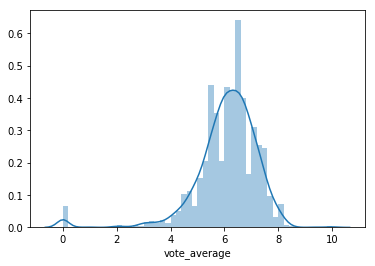

In [4]:
sns.distplot(movies.vote_average);
# As we can see the expected score should be around 6.5
# which suggests that a good movie should be above at least 7.5

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# Classify budgets to ranges
# movies.budget.transform(lambda x: x < 1000000).aggregate(True)
movies['profit'] = (movies.revenue - movies.budget)
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237.000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787.965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550.965087
1,300.000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961.000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661.000000
2,245.000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880.674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,635.674609
3,250.000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084.939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834.939099
4,260.000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284.139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,24.139100
5,258.000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2007-05-01,890.871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,632.871626
6,260.000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2010-11-24,591.794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,331.794936
7,280.000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,2015-04-22,1405.403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]

In [29]:
movies.vote_average.value_counts()

6.5     216
6.0     216
6.7     213
6.3     207
6.1     201
6.4     201
6.2     200
6.6     198
5.9     196
5.8     187
7.0     179
6.8     172
6.9     160
5.7     153
5.5     152
5.6     144
5.4     127
7.3     125
7.1     119
7.2     119
7.4     109
5.3     105
5.2      93
5.0      86
7.5      66
4.9      63
0.0      63
7.6      62
5.1      60
7.7      56
       ... 
8.1      18
8.2      15
3.0      13
4.0      13
3.5      12
3.9      12
3.8      10
3.3       9
3.7       9
8.3       7
3.2       7
2.0       6
2.9       5
10.0      4
3.4       4
3.6       4
3.1       4
2.8       4
1.0       2
8.4       2
2.3       2
8.5       2
0.5       1
9.3       1
2.4       1
2.7       1
2.2       1
9.5       1
2.6       1
1.9       1
Name: vote_average, Length: 71, dtype: int64

In [7]:
movies.isnull().sum().sort_values()

budget                     0
vote_average               0
title                      0
status                     0
spoken_languages           0
revenue                    0
vote_count                 0
production_companies       0
production_countries       0
original_title             0
original_language          0
keywords                   0
id                         0
genres                     0
popularity                 0
profit                     0
release_date               1
runtime                    2
overview                   3
tagline                  844
homepage                3091
dtype: int64